<a href="https://colab.research.google.com/github/Ramyasaisriveni/Fmmllab2024/blob/main/Module4_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 3: Gradient Descent

Gradient descent is a very important algorithm to understand, as it underpins many of the more advanced algorithms used in Machine Learning and Deep Learning.

A brief overview of the algorithm is


*   start with a random initialization of the solution.
*   incrementally change the solution by moving in the direction of negative gradient of the objective function.
*   repeat the previous step until some convergence criteria is met.

The key equation for change in weight is:
$$w^{k+1} \leftarrow w^k - \eta \Delta J$$

In this lab, we will discuss stochastic gradient descent, mini-batch gradient descent and batch gradient descent.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)

# Creating the Data

Let's generate some data with:
\begin{equation} y_0= 4 \end{equation}
\begin{equation} y_1= 3 \end{equation}

and also add some noise to the data.

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

Let's also plot the data we just created

Text(0, 0.5, 'y')

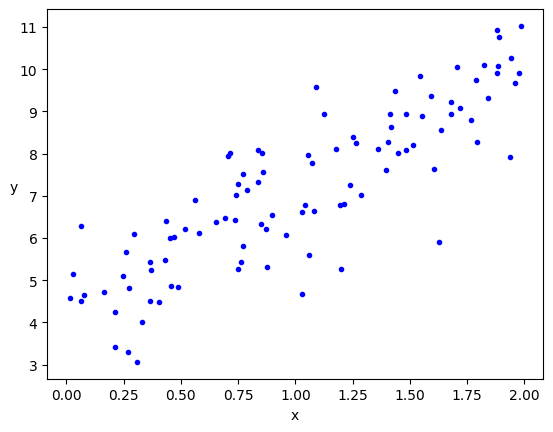

In [3]:
plt.plot(X, y, 'b.')
plt.xlabel('x')
plt.ylabel('y', rotation=0)

## Cost Function

The equation for calculating cost function is as shown below. The cost function is only for linear regression. For other algorithms, the cost function will be different and the gradients would have to be derived from the cost functions

\begin{equation}
J(y_{pred}) = \frac{1}{2} m \sum_{i=1}^{m} (h(y_{pred})^{(i)} - y^{(i)})^2
\end{equation}

In [4]:
def cal_cost(y_pred, X, y):
    '''
    Calculates the cost for given X and Y.
    y_pred = Vector of y_preds
    X = Row of X's np.zeros((2, j))
    y = Actual y's np.zeros((2, 1))

    where:
        j is the no of features
    '''

    m = len(y)

    predictions = X.dot(y_pred)
    cost = (1 / 2 * m) * np.sum(np.square(predictions - y))

    return cost

## Gradients

\begin{equation}
y_{pred_0}: = y_{pred_0} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
y_{pred_1}: = y_{pred_1} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
.

.

.

.

\begin{equation}
y_{pred_j}: = y_{pred_j} -\alpha . (1/m .\sum_{i=1}^{m}(h(y_{pred}^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

In [5]:
def gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=100):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, 2))

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        y_pred = y_pred - (1 / m) * learning_rate * (X.T.dot((prediction - y)))
        y_pred_history[it,:] = y_pred.T
        cost_history[it]  = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

Let's do 1000 iterations with a learning rate of 0.01.
We will start with a random prediction.

In [10]:
lr = 0.01
n_iter = 1000

y_pred = np.random.randn(2,1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history, y_pred_history = gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

ValueError: shapes (20640,9) and (2,1) not aligned: 9 (dim 1) != 2 (dim 0)

Plotting the error vs Number of iterations

NameError: name 'cost_history' is not defined

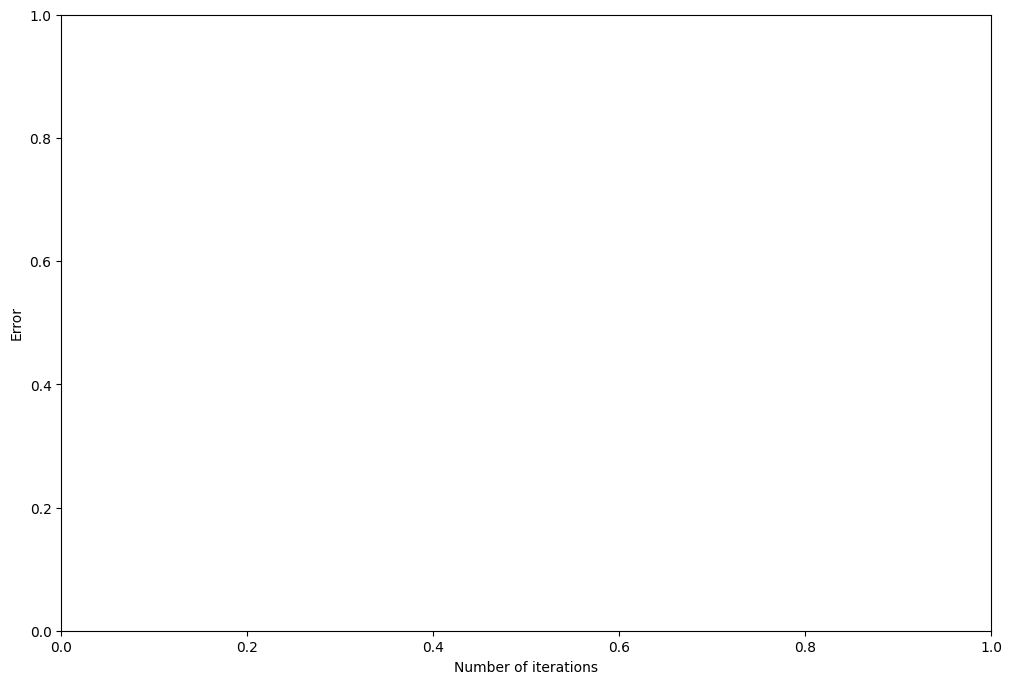

In [14]:
fig, ax = plt.subplots(figsize=(12,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')

ax.plot(range(n_iter), cost_history, 'b.')

Zooming in...

NameError: name 'cost_history' is not defined

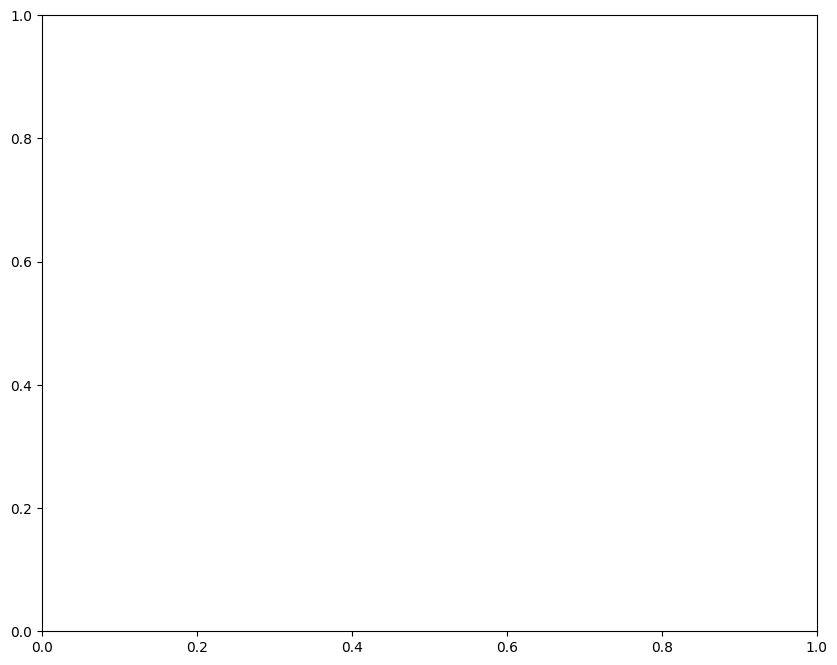

In [13]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(range(200), cost_history[:200], 'b.')

# Stochastic Gradient Descent

In Batch Gradient Descent we were considering all the examples for every step of Gradient Descent. But what if our dataset is very huge. Deep learning models crave for data. The more the data the more chances of a model to be good. Suppose our dataset has 5 million examples, then just to take one step the model will have to calculate the gradients of all the 5 million examples. This does not seem an efficient way. To tackle this problem we have Stochastic Gradient Descent. In Stochastic Gradient Descent (SGD), we consider just one example at a time to take a single step.

In [11]:
def stocashtic_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10):
    '''
    X = Matrix of X with added bias units
    y = Vector of Y
    y_pred = Vector of y_pred np.random.randn(j,1)
    learning_rate
    iterations = no of iterations

    Returns the final y_pred vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)

    for it in range(iterations):
        cost = 0.0

        for i in range(m):
            rand_ind = np.random.randint(0,m)
            X_i = X[rand_ind, :].reshape(1, X.shape[1])
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate *(X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [12]:
lr = 0.5
n_iter = 50
y_pred = np.random.randn(2, 1)
X_b = np.c_[np.ones((len(X), 1)), X]
y_pred, cost_history = stocashtic_gradient_descent(X_b, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

ValueError: shapes (1,9) and (2,1) not aligned: 9 (dim 1) != 2 (dim 0)

NameError: name 'cost_history' is not defined

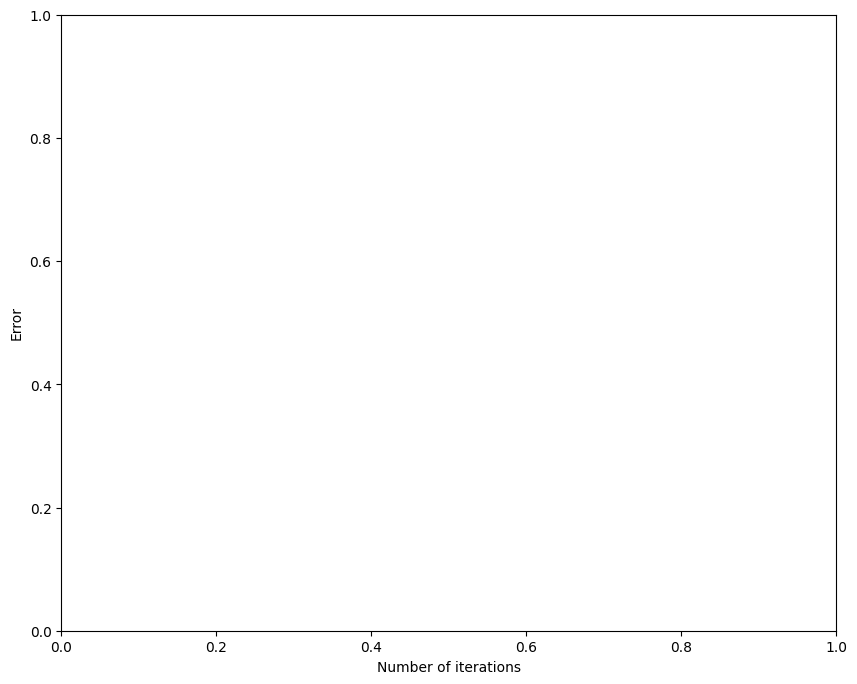

In [15]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

# Mini Batch Gradient Descent

We have seen the Batch Gradient Descent. We have also seen the Stochastic Gradient Descent. Batch Gradient Descent can be used for smoother curves. SGD can be used when the dataset is large. Batch Gradient Descent converges directly to minima. SGD converges faster for larger datasets. But, since in SGD we use only one example at a time, we cannot implement the vectorized implementation on it. This can slow down the computations. To tackle this problem, a mixture of Batch Gradient Descent and SGD is used.
Neither we use all the dataset all at once nor we use the single example at a time. We use a batch of a fixed number of training examples which is less than the actual dataset and call it a mini-batch. Doing this helps us achieve the advantages of both the former variants we saw.

In [16]:
def minibatch_gradient_descent(X, y, y_pred, learning_rate=0.01, iterations=10, batch_size=20):
    '''
    X = Matrix of X without added bias units
    y = Vector of Y
    y_pred = Vector of y_preds np.random.randn(j, 1)
    learning_rate
    iterations = no of iterations

    Returns the final theta vector and array of cost history over no of iterations
    '''

    m = len(y)
    cost_history = np.zeros(iterations)
    n_batches = int(m / batch_size)

    for it in range(iterations):
        cost = 0.0
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]

        for i in range(0, m, batch_size):
            X_i = X[i: i + batch_size]
            y_i = y[i: i + batch_size]

            X_i = np.c_[np.ones(len(X_i)), X_i]
            prediction = np.dot(X_i, y_pred)

            y_pred = y_pred - (1 / m) * learning_rate * (X_i.T.dot((prediction - y_i)))
            cost += cal_cost(y_pred, X_i, y_i)

        cost_history[it]  = cost

    return y_pred, cost_history

In [17]:
lr = 0.1
n_iter = 200
y_pred = np.random.randn(2,1)
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter)

print('y_pred[0]: {:0.3f}\ny_pred[1]: {:0.3f}'.format(y_pred[0][0], y_pred[1][0]))
print('Final error: {:0.3f}'.format(cost_history[-1]))

ValueError: shapes (20,9) and (2,1) not aligned: 9 (dim 1) != 2 (dim 0)

In [ ]:
fig, ax = plt.subplots(figsize=(10,8))

ax.set_ylabel('Error')
ax.set_xlabel('Number of iterations')
y_pred = np.random.randn(2,1)

ax.plot(range(n_iter), cost_history, 'b.')

Things to try out:

1. Change batch size in mini-batch gradient descent.
2. Test all the three out on real datasets.
3. Compare the effects of changing learning rate by the same amount in Batch GD, SGD and Mini-batch GD.

**Answer 1:-**

#Change Batch Size in Mini-Batch Gradient Descent
You can easily modify the batch size in the minibatch_gradient_descent function by changing the batch_size parameter.

In [8]:
# Original batch size is 20
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size=20)

# Change batch size to 32
y_pred, cost_history = minibatch_gradient_descent(X, y, y_pred, lr, n_iter, batch_size=32)

NameError: name 'minibatch_gradient_descent' is not defined

#Reasoning:
*The batch_size parameter controls how many data points are used to calculate the gradient for each update step.
*A larger batch size leads to a smoother convergence but can be computationally more expensive per iteration.
*A smaller batch size introduces more noise but can help escape local minima and potentially converge faster overall.

**Answer 2:-**

#Test All Three on Real Datasets
To test the three gradient descent methods on real datasets, you can use datasets readily available in libraries like scikit-learn. Here's an example using the California housing dataset:

In [7]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target.reshape(-1, 1)  # Reshape to a column vector

# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add bias term to X_train
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]

# Initialize y_pred
y_pred = np.random.randn(X_train_b.shape[1], 1)

# Apply the gradient descent methods
# ... (Use the existing functions with X_train_b, y_train) ...

# Evaluate on the test set (e.g., using mean squared error)
# ...

#Reasoning:

*Loading and Preprocessing: We load the dataset, standardize features (important for gradient descent), and split it into training and testing sets. Adding Bias Term: The bias term is added to the training data for the intercept.

*Applying Gradient Descent: You can now call your gradient_descent, stocashtic_gradient_descent, and minibatch_gradient_descent functions, passing in the appropriate training data and parameters. Evaluation: After training, evaluate the model's performance on the test set to get a realistic measure of its generalization ability.

**Answer 3:-**

#Compare Effects of Learning Rate Changes
To compare the impact of learning rate changes, you can run experiments with different learning rates for each gradient descent method and observe their convergence behavior.

In [6]:
import numpy as np

def gradient_descent(X, y, y_pred, learning_rate, iterations):
    """
    Gradient Descent function to minimize the cost function.

    Args:
        X (numpy.ndarray): Feature matrix.
        y (numpy.ndarray): Target variable vector.
        y_pred (numpy.ndarray): Initial prediction vector.
        learning_rate (float): Learning rate for gradient descent.
        iterations (int): Number of iterations to perform.

    Returns:
        tuple: Updated prediction vector, cost history, and prediction history.
    """
    m = len(y)
    cost_history = np.zeros(iterations)
    y_pred_history = np.zeros((iterations, len(y_pred)))  # Updated to match y_pred shape

    for it in range(iterations):
        prediction = np.dot(X, y_pred)
        # Reshape (prediction - y) to match X.T shape for proper matrix multiplication
        error = (prediction - y).reshape(-1, 1)
        # Update y_pred, ensuring compatibility with the update term's dimensions
        y_pred = y_pred - (learning_rate / m) * X.T.dot(error)
        y_pred_history[it, :] = y_pred.T  # Updated to match y_pred shape
        cost_history[it] = cal_cost(y_pred, X, y)

    return y_pred, cost_history, y_pred_history

## **Additional Critical Thinking Question**



**Which of the following is TRUE, given the optimal learning rate?**

 (i) Batch gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (ii) Stochastic gradient descent is always guaranteed to converge to the global optimum of a loss function.

 (iii) For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not.

 (iv) For convex loss functions (i.e. with a bowl shape), stochastic gradient descent is guaranteed to eventually converge to the global optimum while batch gradient descent is not.

 (v) For convex loss functions (i.e. with a bowl shape), both stochastic gradient descent and batch gradient descent will eventually converge to the global optimum.

 (vi) For convex loss functions (i.e. with a bowl shape), neither stochastic gradient descent nor batch gradient descent are guaranteed to converge to the global optimum.

**The correct answer is (iii).**

For convex loss functions (i.e. with a bowl shape), batch gradient descent is guaranteed to eventually converge to the global optimum while stochastic gradient descent is not. True. This is the key difference. Batch gradient descent, with a properly chosen learning rate, consistently moves towards the minimum of the convex function and eventually reaches the global optimum. SGD, due to its randomness, may not settle at the exact minimum but instead oscillate around it.

In [19]:
class Graph:
    def _init_(self, vertices):
        self.V = vertices
        self.graph = defaultdict(list)
        self.time = 0


    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)


    def BCCUtil(self, u, parent, visited, disc, low, st):
        children = 0
        visited[u] = True
        disc[u] = low[u] = self.time
        self.time += 1


        for v in self.graph[u]:
            if not visited[v]:
                children += 1
                st.append((u, v))
                self.BCCUtil(v, u, visited, disc, low, st)


                low[u] = min(low[u], low[v])


                if parent is None and children > 1 or parent is not None and low[v] >= disc[u]:
                    bcc = []
                    while st[-1] != (u, v):
                        bcc.append(st.pop())
                    bcc.append(st.pop())
                    print("Bi-Connected Component:", bcc)

            elif v != parent and disc[v] < disc[u]:
                low[u] = min(low[u], disc[v])
                st.append((u, v))


    def BCC(self):
        visited = [False] * self.V
        disc = [-1] * self.V
        low = [-1] * self.V
        parent = None
        st = []


        for i in range(self.V):
            if not visited[i]:
                self.BCCUtil(i, parent, visited, disc, low, st)


        if st:
            bcc = []
            while st:
                bcc.append(st.pop())
            print("Bi-Connected Component:", bcc)


if _name_ == "_main_":

    g = Graph(5)
    g.add_edge(0, 1)
    g.add_edge(0, 2)
    g.add_edge(1, 2)
    g.add_edge(1, 3)
    g.add_edge(3, 4)

    print("Bi-Connected Components in the graph:")
    g.BCC()

NameError: name '_name_' is not defined

In [20]:
class Graph:
    def __init__(self, vertices):  # Changed _init_ to __init__
        self.V = vertices
        self.graph = defaultdict(list)
        self.time = 0


    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)


    def BCCUtil(self, u, parent, visited, disc, low, st):
        children = 0
        visited[u] = True
        disc[u] = low[u] = self.time
        self.time += 1


        for v in self.graph[u]:
            if not visited[v]:
                children += 1
                st.append((u, v))
                self.BCCUtil(v, u, visited, disc, low, st)


                low[u] = min(low[u], low[v])


                if parent is None and children > 1 or parent is not None and low[v] >= disc[u]:
                    bcc = []
                    while st[-1] !=

SyntaxError: invalid syntax (<ipython-input-20-fb36cc82e4d8>, line 32)

In [21]:
class Graph:
    def __init__(self, vertices):  # Changed _init_ to __init__
        self.V = vertices
        self.graph = defaultdict(list)
        self.time = 0


    def add_edge(self, u, v):
        self.graph[u].append(v)
        self.graph[v].append(u)


    def BCCUtil(self, u, parent, visited, disc, low, st):
        children = 0
        visited[u] = True
        disc[u] = low[u] = self.time
        self.time += 1


        for v in self.graph[u]:
            if not visited[v]:
                children += 1
                st.append((u, v))
                self.BCCUtil(v, u, visited, disc, low, st)


                low[u] = min(low[u], low[v])


                if parent is None and children > 1 or parent is not None and low[v] >= disc[u]:
                    bcc = []
                    while st[-1] != (u, v):
                        bcc.append(st.pop())
                    bcc.append(st.pop())
                    print("Bi-Connected Component:", bcc)

            elif v != parent and disc[v] < disc[u]:
                low[u] = min(low[u], disc[v])
                st.append((u, v))


    def BCC(self):
        visited = [False] * self.V
        disc = [-1] * self.V
        low = [-1] * self.V
        parent = None
        st = []


        for i in range(self.V):
            if not visited[i]:
                self.BCCUtil(i, parent, visited, disc, low, st)


        if st:
            bcc = []
            while st:
                bcc.append(st.pop())
            print("Bi-Connected Component:", bcc)


if __name__ == "__main__": # Changed _name_ to __name__ and "_main_" to "__main__"
    from collections import defaultdict  # Imported defaultdict here

    g = Graph(5)
    g.add_edge(0, 1)
    g.add_edge(0, 2)
    g.add_edge(1, 2)
    g.add_edge(1, 3)
    g.add_edge(3, 4)

    print("Bi-Connected Components in the graph:")
    g.BCC()

Bi-Connected Components in the graph:
Bi-Connected Component: [(3, 4)]
Bi-Connected Component: [(1, 3)]
Bi-Connected Component: [(2, 0), (1, 2), (0, 1)]
